In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(url)

In [3]:
print(df.head())
df.info()

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [11]:
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))

AINextMuch less integrated    98.245641
AINextLess integrated         96.401119
AINextNo change               80.900714
AINextMuch more integrated    79.464217
EmbeddedAdmired               74.428840
                                ...    
MainBranch                     0.000000
Check                          0.000000
Employment                     0.000000
Age                            0.000000
ResponseId                     0.000000
Length: 114, dtype: float64


In [12]:
threshold = 50
cols_to_drop = missing_percent[missing_percent > threshold].index
df = df.drop(columns=cols_to_drop)
print(f"Dropped columns: {list(cols_to_drop)}")

Dropped columns: ['PlatformAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechAdmired', 'AIToolInterested in Using', 'AIToolNot interested in Using', 'AINextMuch more integrated', 'AINextNo change', 'AINextMore integrated', 'AINextLess integrated', 'AINextMuch less integrated', 'ICorPM', 'WorkExp', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Knowledge_9', 'Frequency_1', 'Frequency_2', 'Frequency_3', 'TimeSearching', 'TimeAnswering', 'Frustration', 'ProfessionalTech', 'ProfessionalCloud', 'ProfessionalQuestion', 'Industry', 'JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'ConvertedCompYearly', 'JobSat']


In [13]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

In [14]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    mode_value = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
    df[col] = df[col].fillna(mode_value)

In [15]:
print(df.isnull().sum().sum())

0


In [16]:
print(f"Duplicates found: {df.duplicated().sum()}")

Duplicates found: 0


In [18]:
print(df.dtypes)

ResponseId       int64
MainBranch      object
Age             object
Employment      object
RemoteWork      object
                 ...  
AIEthics        object
AIChallenges    object
TBranch         object
SurveyLength    object
SurveyEase      object
Length: 70, dtype: object


In [19]:
print('LanguageHaveWorkedWith' in df.columns)
print('LanguageWantToWorkWithNextYear' in df.columns)

True
False


In [ ]:
#Top 10 current programming languages

In [21]:
print(df['LanguageHaveWorkedWith'])

0                           HTML/CSS;JavaScript;TypeScript
1        Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                       C#
3        C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4                  C++;HTML/CSS;JavaScript;Lua;Python;Rust
                               ...                        
65432                       HTML/CSS;JavaScript;TypeScript
65433                       HTML/CSS;JavaScript;TypeScript
65434                       HTML/CSS;JavaScript;TypeScript
65435             C;C++;Go;Lua;Objective-C;Python;Rust;SQL
65436     C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript
Name: LanguageHaveWorkedWith, Length: 65437, dtype: object


In [24]:
current_langs = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode()

In [25]:
current_lang_counts = current_langs.value_counts().head(10)

/var/folders/qr/ylx4btj500ddg44fksrpsyz00000gn/T/ipykernel_4574/2312256503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=current_lang_counts.values, y=current_lang_counts.index, palette='viridis')


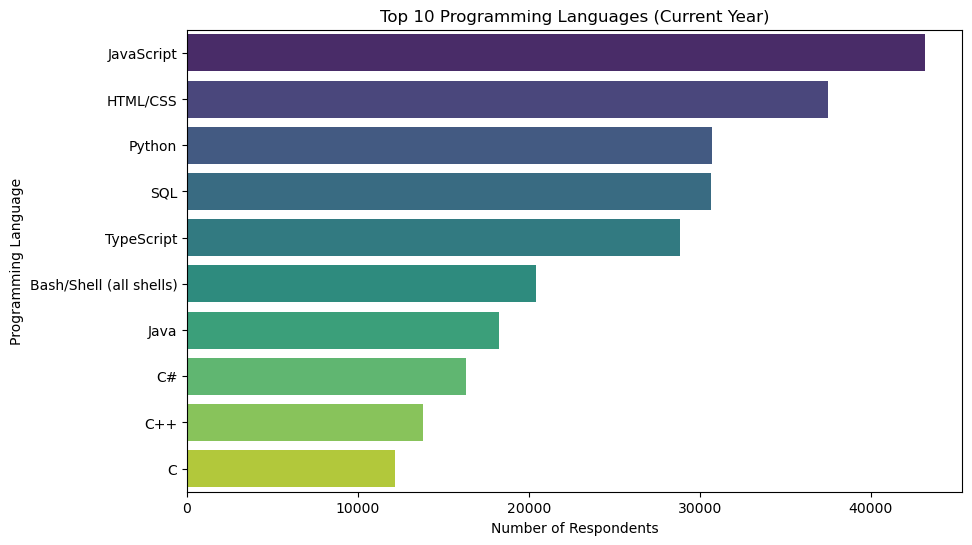

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x=current_lang_counts.values, y=current_lang_counts.index, palette='viridis')
plt.title('Top 10 Programming Languages (Current Year)')
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Language')
plt.show()

In [27]:
print([col for col in df.columns if 'Language' in col])

['LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired']


In [ ]:
# Anticipated trends for next year

In [28]:
future_langs = df['LanguageWantToWorkWith'].dropna().str.split(';').explode()
future_lang_counts = future_langs.value_counts().head(10)

/var/folders/qr/ylx4btj500ddg44fksrpsyz00000gn/T/ipykernel_4574/3172790313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=future_lang_counts.values, y=future_lang_counts.index, palette='coolwarm')


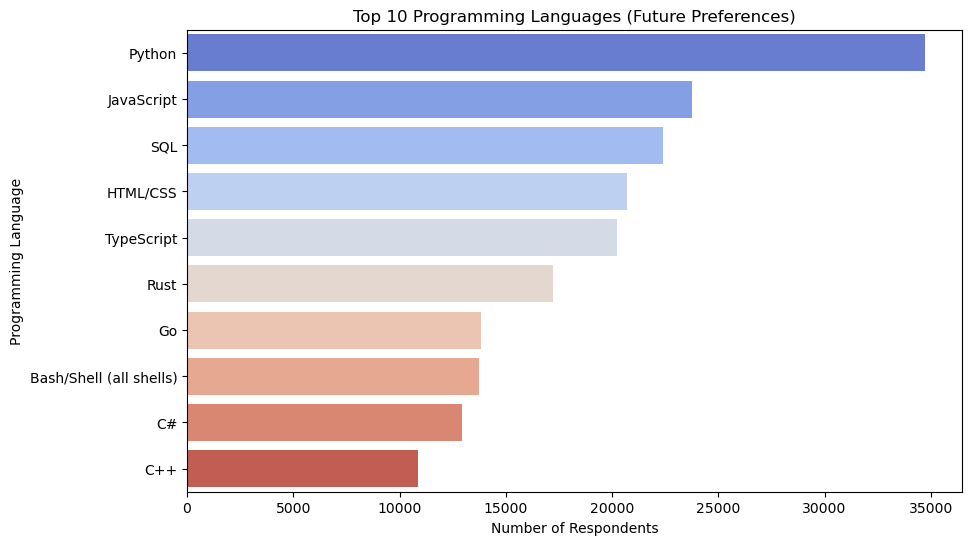

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x=future_lang_counts.values, y=future_lang_counts.index, palette='coolwarm')
plt.title('Top 10 Programming Languages (Future Preferences)')
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Language')
plt.show()

In [30]:
print([col for col in df.columns if 'Database' in col])

['DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired']


In [ ]:
# Top 10 databases in use

In [31]:
current_dbs = df['DatabaseHaveWorkedWith'].dropna().str.split(';').explode()
current_db_counts = current_dbs.value_counts().head(10)

/var/folders/qr/ylx4btj500ddg44fksrpsyz00000gn/T/ipykernel_4574/2959833228.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=current_db_counts.values, y=current_db_counts.index, palette='viridis')


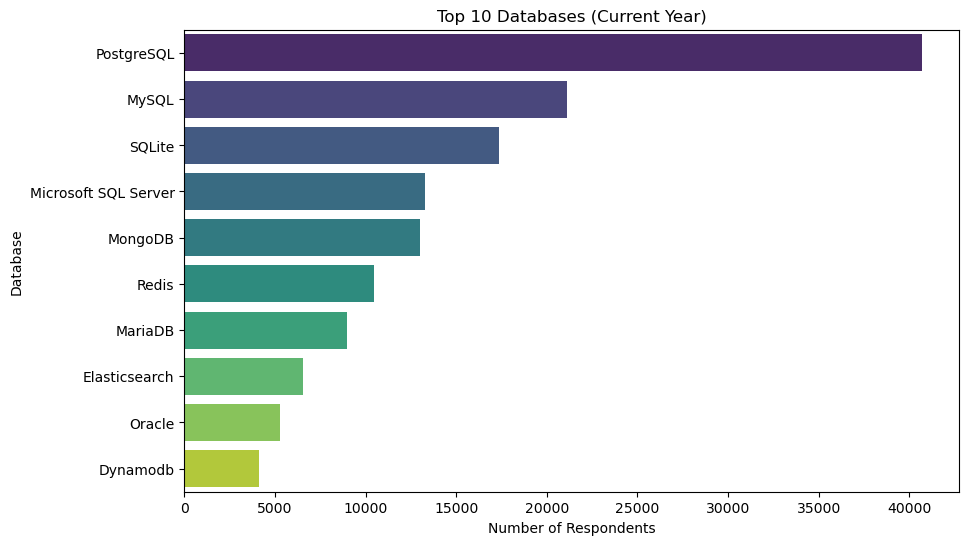

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x=current_db_counts.values, y=current_db_counts.index, palette='viridis')
plt.title('Top 10 Databases (Current Year)')
plt.xlabel('Number of Respondents')
plt.ylabel('Database')
plt.show()

In [ ]:
# Top 10 databases in anticipated future demand 

In [33]:
future_dbs = df['DatabaseWantToWorkWith'].dropna().str.split(';').explode()
future_db_counts = future_dbs.value_counts().head(10)

/var/folders/qr/ylx4btj500ddg44fksrpsyz00000gn/T/ipykernel_4574/1389969683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=future_db_counts.values, y=future_db_counts.index, palette='coolwarm')


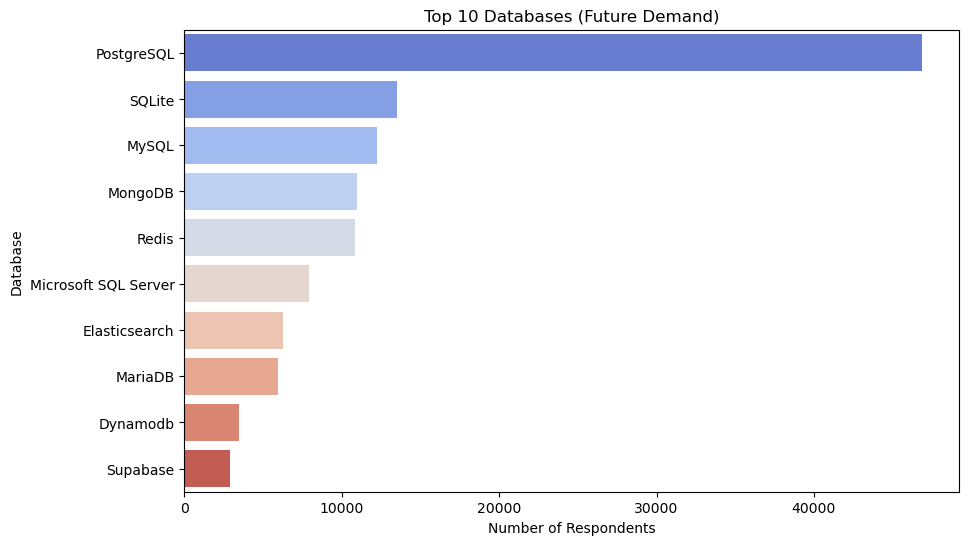

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=future_db_counts.values, y=future_db_counts.index, palette='coolwarm')
plt.title('Top 10 Databases (Future Demand)')
plt.xlabel('Number of Respondents')
plt.ylabel('Database')
plt.show()

In [48]:
import pandas as pd

# Assuming df_have_worked and df_want_to_work are your wide-format DataFrames

def wide_to_long(df, file_name):
    long_data = []

    for category in ['Language', 'Database', 'Platform', 'Webframe']:
        techs = df[f'{category}_Tech']
        counts = df[f'{category}_Count']
        for tech, count in zip(techs, counts):
            long_data.append({'Category': category, 'Technology': tech, 'Count': count})

    long_df = pd.DataFrame(long_data)
    long_df.to_csv(file_name, index=False)
    print(f'Saved long-format data to {file_name}')

# Convert both files:
wide_to_long(df_have_worked, 'have_worked_long.csv')
wide_to_long(df_want_to_work, 'want_to_work_long.csv')

Saved long-format data to have_worked_long.csv
Saved long-format data to want_to_work_long.csv


In [49]:
from IPython.display import FileLink

# Example: link to one file
display(FileLink('have_worked_long.csv'))
display(FileLink('want_to_work_long.csv'))

/Users/reginaleonova/have_worked_long.csv

/Users/reginaleonova/want_to_work_long.csv

In [53]:
import pandas as pd

# Load your dataset if not already loaded
# df = pd.read_csv('your_original_data.csv')

# Count respondents by Country
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
country_counts.to_csv('country_counts.csv', index=False)

# Count respondents by Age
age_counts = df['Age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Count']
age_counts.to_csv('age_counts.csv', index=False)

In [54]:
display(FileLink('country_counts.csv'))
display(FileLink('age_counts.csv'))

/Users/reginaleonova/country_counts.csv

/Users/reginaleonova/age_counts.csv

In [55]:
print('EdLevel' in df.columns)
print('Employment' in df.columns)

True
True


In [ ]:
# Popular education levels

In [56]:
ed_counts = df['EdLevel'].value_counts().head(10)

/var/folders/qr/ylx4btj500ddg44fksrpsyz00000gn/T/ipykernel_4574/4199540169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ed_counts.values, y=ed_counts.index, palette='viridis')


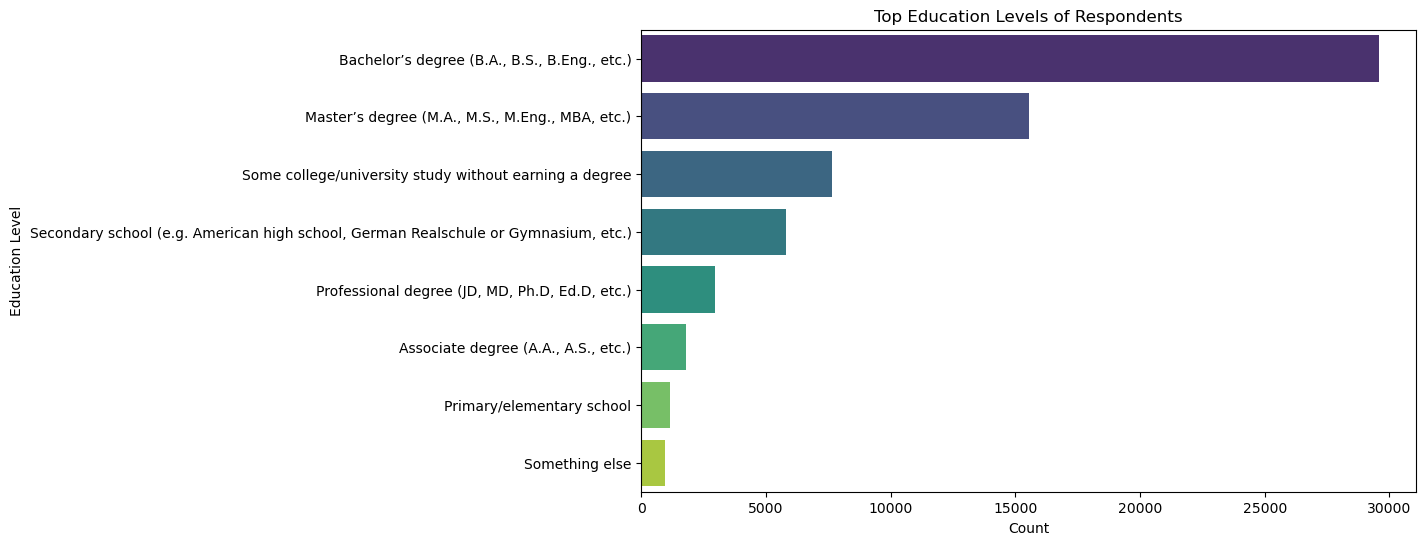

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(x=ed_counts.values, y=ed_counts.index, palette='viridis')
plt.title('Top Education Levels of Respondents')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

In [ ]:
# % of full-time vs part-time etc

In [60]:
emp_counts = df['Employment'].value_counts().head(10)

/var/folders/qr/ylx4btj500ddg44fksrpsyz00000gn/T/ipykernel_4574/2429101082.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emp_counts.values, y=emp_counts.index, palette='magma')


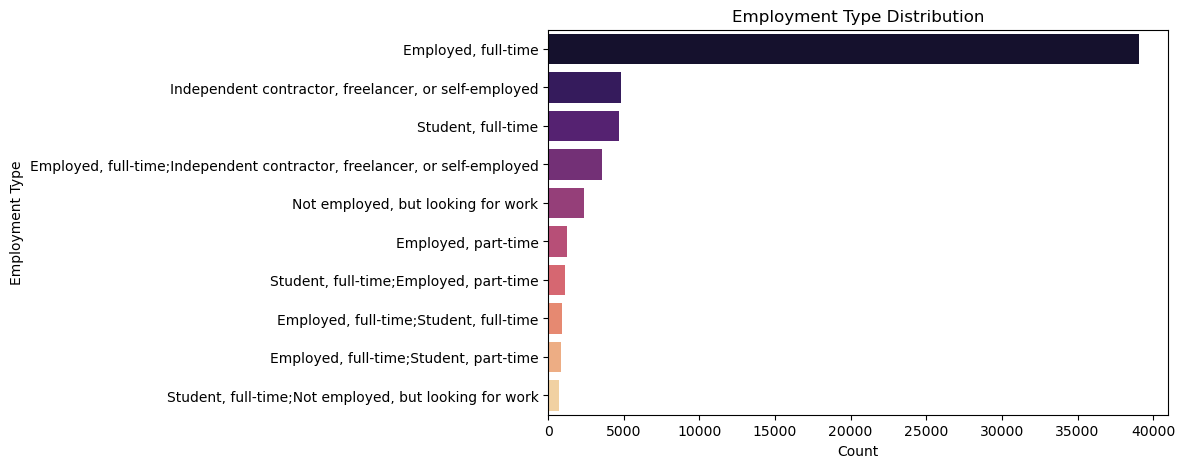

In [61]:
plt.figure(figsize=(8,5))
sns.barplot(x=emp_counts.values, y=emp_counts.index, palette='magma')
plt.title('Employment Type Distribution')
plt.xlabel('Count')
plt.ylabel('Employment Type')
plt.show()